In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import shap
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [153]:
df=pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [154]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [155]:
df.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


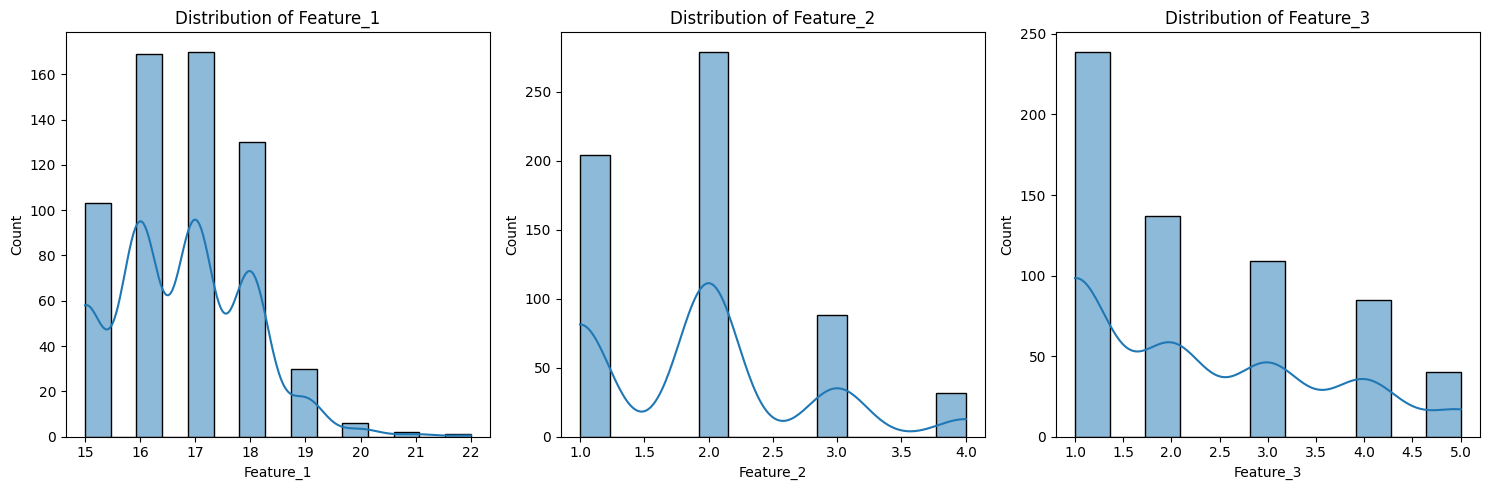

In [156]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(1, 3, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.subplot(1, 3, 3)
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')
plt.tight_layout()
plt.show()

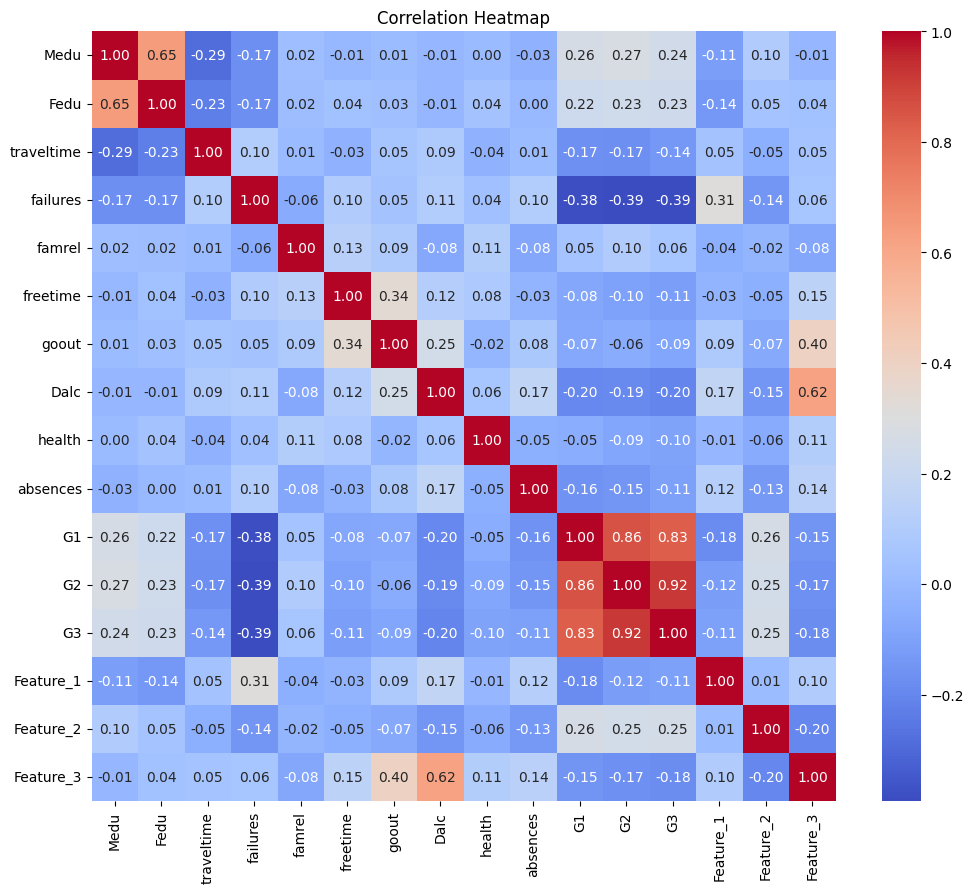

In [157]:
plt.figure(figsize=(12, 10))
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [158]:
print("\nFeature_1:")
print(correlation_matrix['Feature_1'].sort_values(ascending=False))
print("\nFeature_2:")
print(correlation_matrix['Feature_2'].sort_values(ascending=False))
print("\nFeature_3:")
print(correlation_matrix['Feature_3'].sort_values(ascending=False))


Feature_1:
Feature_1     1.000000
failures      0.312151
Dalc          0.168583
absences      0.119640
Feature_3     0.097160
goout         0.089430
traveltime    0.045970
Feature_2     0.014528
health       -0.007759
freetime     -0.026015
famrel       -0.040149
G3           -0.105610
Medu         -0.111327
G2           -0.118624
Fedu         -0.138840
G1           -0.181571
Name: Feature_1, dtype: float64

Feature_2:
Feature_2     1.000000
G1            0.261477
G3            0.249884
G2            0.245547
Medu          0.097210
Fedu          0.051633
Feature_1     0.014528
famrel       -0.018598
freetime     -0.045388
traveltime   -0.048797
health       -0.062246
goout        -0.068552
absences     -0.133554
failures     -0.144468
Dalc         -0.147515
Feature_3    -0.199162
Name: Feature_2, dtype: float64

Feature_3:
Feature_3     1.000000
Dalc          0.624373
goout         0.397811
freetime      0.149797
absences      0.138778
health        0.110179
Feature_1     0.097160
fai

In [159]:
df[df['Feature_1']>19][["failures","Feature_1"]]

,failures,Feature_1
279,3,22.0
299,0,20.0
351,2,20.0
407,2,21.0
413,2,21.0
414,0,20.0
421,1,20.0
506,1,20.0
574,1,20.0


# Feature 1
If we analyse the values of feature 1, they are discrete in the range (15-19) that can denote the age of students. There is also a small amount of data where it ranges from 19-22 but the number of failures has a strong correlation with Feature 1 and we can see that also from the table above

# Feature 2
Feature 2 has a strong correlation index with G1, G2 and G3 and also a negative index with failures, goout, Dalc. The most probable feature that it can denote is the Study hours (1 to 4) 1 being the least and 4 being the most

# Feature 3
Feature 3 has a VERY STRONG correlation with Dalc and goout and a negative correlation with grades. It should represent the Time a student spends hanging out with friends on a scale of 1 to 4

In [160]:
df = df.rename(columns={'Feature_1': 'age', 'Feature_2': 'stutime','Feature_3':'friendstime'})

In [161]:
df.isnull().sum()

,0
school,0
sex,0
address,0
famsize,50
Pstatus,0
Medu,0
Fedu,73
Mjob,0
Fjob,0
reason,0


From the above analysis we can see that there are some null values in the columns famsize, Fedu, traveltime, higher, freetime, absences, Feature_1, Feature_2, Feature_3

COLUMNS like famsize, Fedu, traveltime, higher, freetime, Feature_2, Feature_3 are categorical values that we'll fill with the mode values

Then we will check skew values of the remaining numerical columns
if the |skew|>1, we replace the null values with median
else, we replace with the mean

In [162]:
category_cols=['famsize','Fedu','traveltime','higher','freetime','stutime','friendstime']
for col in category_cols:

  df[col]=df[col].fillna(df[col].mode()[0])

print(df['absences'].skew())
print(df['age'].skew())
print(df['G2'].skew())

numerical_cols=['absences','age','G2']
for col in numerical_cols:
  if(df[col].skew()>1 or df[col].skew()<-1):
    df[col]=df[col].fillna(df[col].median())
  else:
    df[col]=df[col].fillna(np.round(df[col].mean(),2))
df.isnull().sum()

2.0154730305265858
0.44249707516159553
-0.40773895797390214


,0
school,0
sex,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0
reason,0


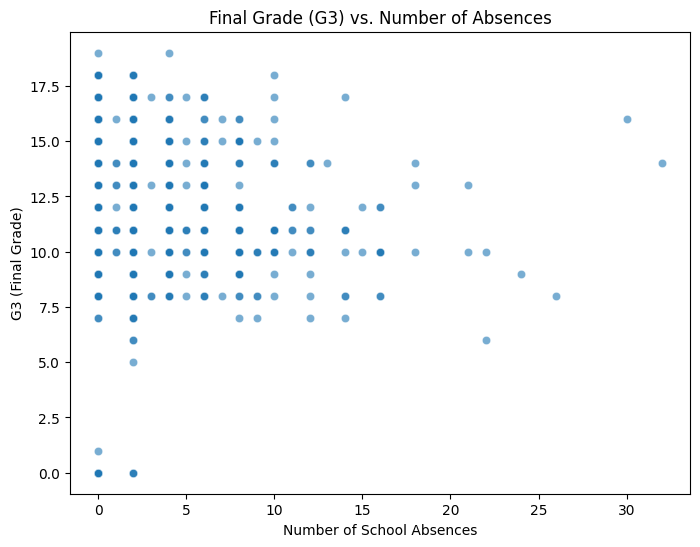

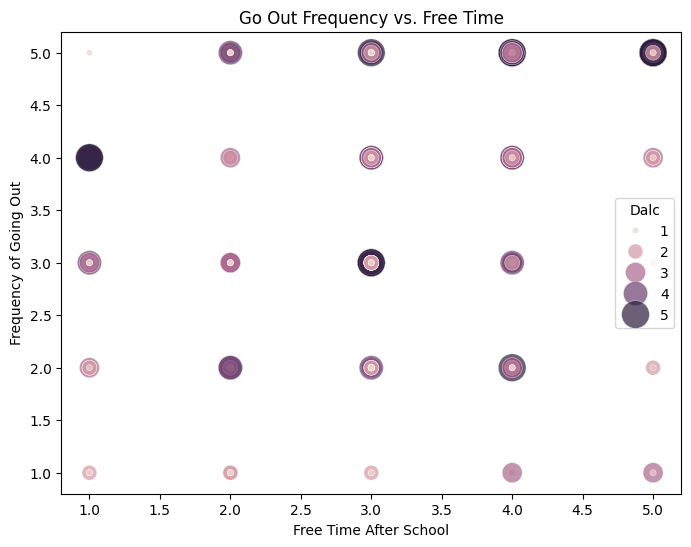

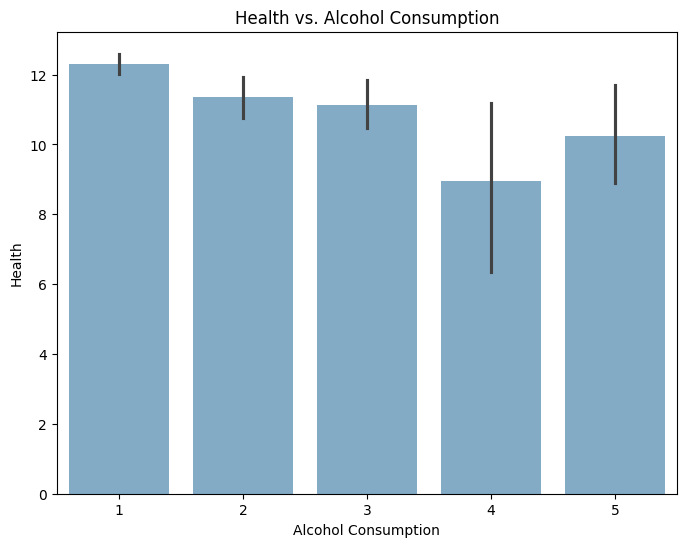

Interpretation 4: This box plot examines if there's a relationship between a student's final grade and their mother's education level. It can suggest whether higher parental education correlates with better student academic performance.


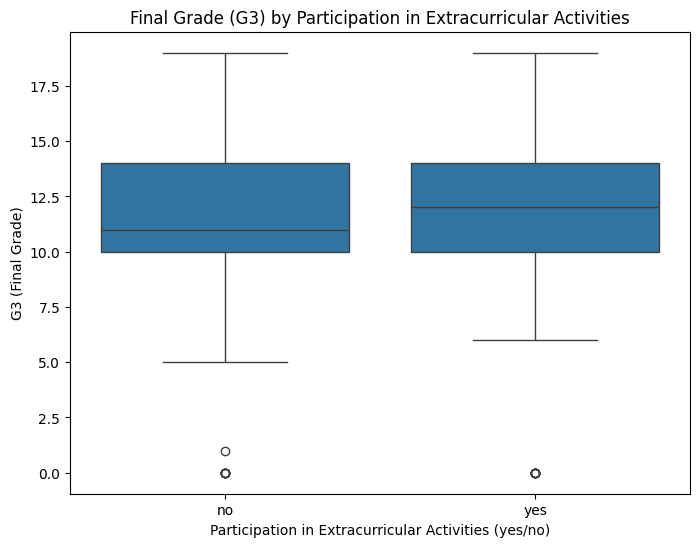

Interpretation 5: This box plot investigates if participation in extracurricular activities is associated with different levels of final grades. It can suggest whether engaging in activities has a positive, negative, or neutral impact on academic performance.


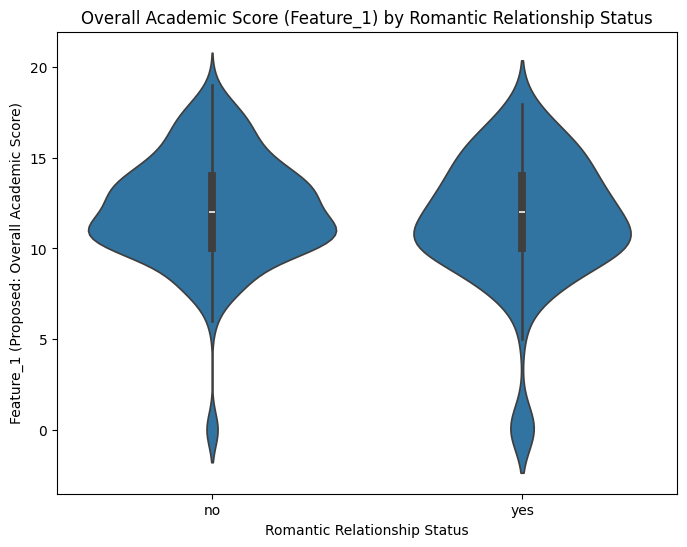

Interpretation: This violin plot shows the distribution of the proposed 'Overall Academic Score' (Feature_1) for students in and not in romantic relationships. It can reveal if there are noticeable differences in academic performance between these two groups.


In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='absences', y='G3', alpha=0.6)
plt.title('Final Grade (G3) vs. Number of Absences')
plt.xlabel('Number of School Absences')
plt.ylabel('G3 (Final Grade)')
plt.grid(False)
plt.show()

# Question 3: How does 'freetime' vary with 'goout' frequency?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='freetime', y='goout', hue='Dalc', size='Dalc', sizes=(20, 400), alpha=0.7)
plt.title('Go Out Frequency vs. Free Time')
plt.xlabel('Free Time After School')
plt.ylabel('Frequency of Going Out')
plt.grid(False)
plt.show()

# Question 4: How is your health related to your life?
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Dalc', y='G3', alpha=0.6)
plt.title('Health vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Health')
plt.grid(False)
plt.show()
print("Interpretation 4: This box plot examines if there's a relationship between a student's final grade and their mother's education level. It can suggest whether higher parental education correlates with better student academic performance.")

# Question 5: How does 'activities' (extracurricular participation) influence 'G3' (Final Grade)?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='activities', y='G3')
plt.title('Final Grade (G3) by Participation in Extracurricular Activities')
plt.xlabel('Participation in Extracurricular Activities (yes/no)')
plt.ylabel('G3 (Final Grade)')
plt.show()
print("Interpretation 5: This box plot investigates if participation in extracurricular activities is associated with different levels of final grades. It can suggest whether engaging in activities has a positive, negative, or neutral impact on academic performance.")

# Additional Question (Example): Distribution of 'Feature_1' (Proposed: Overall Academic Score) by 'romantic' status
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='romantic', y='G3')
plt.title('Overall Academic Score (Feature_1) by Romantic Relationship Status')
plt.xlabel('Romantic Relationship Status')
plt.ylabel('Feature_1 (Proposed: Overall Academic Score)')
plt.show()
print("Interpretation: This violin plot shows the distribution of the proposed 'Overall Academic Score' (Feature_1) for students in and not in romantic relationships. It can reveal if there are noticeable differences in academic performance between these two groups.")



In [164]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

ans=[]
y = y.apply(lambda x: 1 if x=='yes' else 0)
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian','Medu','Fedu','traveltime',
                        'Mjob', 'Fjob', 'reason', 'schoolsup', 'famsup', 'paid',
                        'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
                      'goout', 'Dalc', 'health','failures', 'stutime', 'friendstime']
numerical_features = ['absences', 'G1', 'G2', 'G3',
                      'age']
X_processed = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X_processed

scaler = StandardScaler()
X_processed[numerical_features] = scaler.fit_transform(X_processed[numerical_features])

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.1, random_state=42, stratify=y)
# print(f"\nTrain set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# 4. Choose and Train Classification Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB()
}

performance_metrics = {}

# print("\nTraining and Evaluating Models:")
for name, model in models.items():
    # print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    cm = confusion_matrix(y_test, y_pred)

    ans.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })

    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1-Score: {f1:.4f}")
    # print(f"ROC AUC: {roc_auc:.4f}")
    # print(f"Confusion Matrix:\n{cm}")
    result=pd.DataFrame(ans).set_index('Model')

result

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Confusion Matrix
Model,,,,,,
Logistic Regression,0.569231,0.300000,0.125000,0.176471,0.581301,"[[34, 7], [21, 3]]"
Decision Tree,0.676923,0.560000,0.583333,0.571429,0.657520,"[[30, 11], [10, 14]]"
Random Forest,0.600000,0.375000,0.125000,0.187500,0.537602,"[[36, 5], [21, 3]]"
Gradient Boosting,0.553846,0.272727,0.125000,0.171429,0.485772,"[[33, 8], [21, 3]]"
Support Vector Machine,0.600000,0.333333,0.083333,0.133333,0.601626,"[[37, 4], [22, 2]]"
K-Nearest Neighbors,0.553846,0.380952,0.333333,0.355556,0.538618,"[[28, 13], [16, 8]]"
Naive Bayes,0.507692,0.250000,0.166667,0.200000,0.444106,"[[29, 12], [20, 4]]"



--- Level 5: Model Reasoning & Interpretation ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


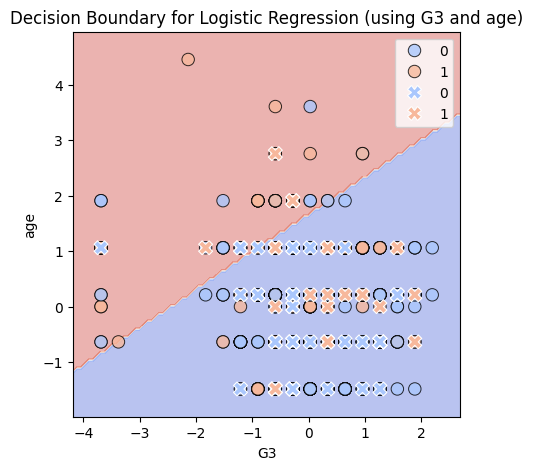

Interpretation: This plot shows how the Logistic Regression model separates students based on G3 and age.


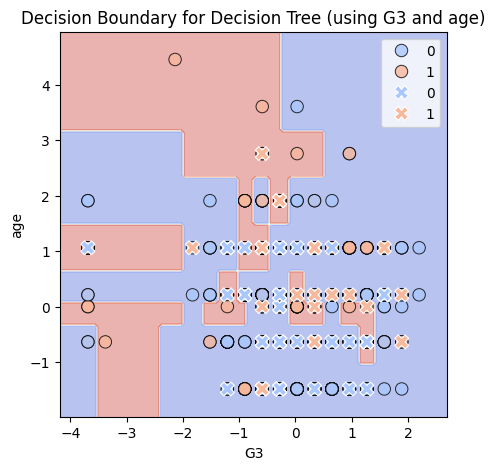

Interpretation: This plot shows how the Decision Tree model separates students based on G3 and age.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


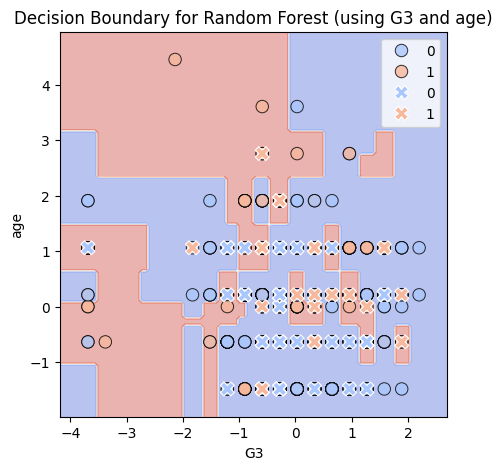

Interpretation: This plot shows how the Random Forest model separates students based on G3 and age.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


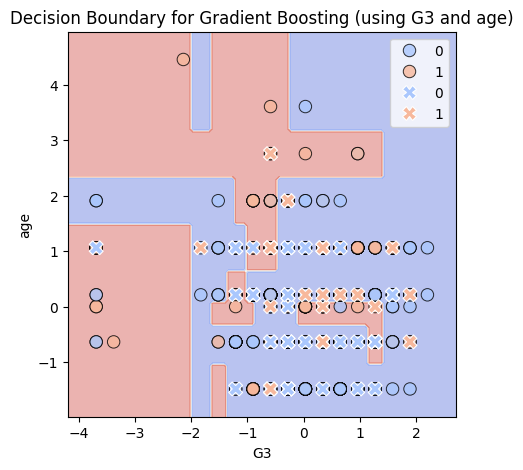

Interpretation: This plot shows how the Gradient Boosting model separates students based on G3 and age.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


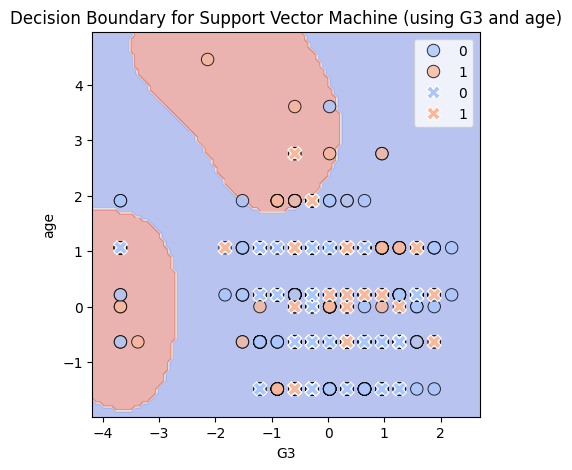

Interpretation: This plot shows how the Support Vector Machine model separates students based on G3 and age.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


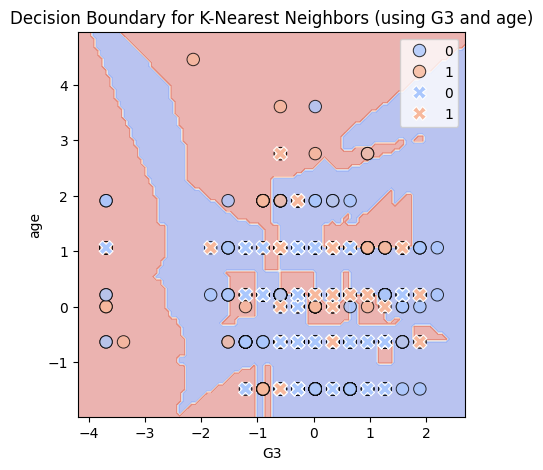

Interpretation: This plot shows how the K-Nearest Neighbors model separates students based on G3 and age.


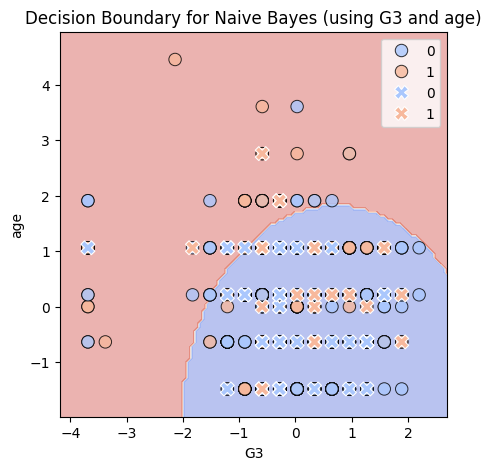

Interpretation: This plot shows how the Naive Bayes model separates students based on G3 and age.


In [165]:


print("\n--- Level 5: Model Reasoning & Interpretation ---")

selected_features_for_boundary = ['G3', 'age']

X_train_2d = X_train[selected_features_for_boundary]
X_test_2d = X_test[selected_features_for_boundary]

for name,model_2d in models.items():
  model_2d.fit(X_train_2d, y_train)

  x_min, x_max = X_processed[selected_features_for_boundary[0]].min() - 0.5, X_processed[selected_features_for_boundary[0]].max() + 0.5
  y_min, y_max = X_processed[selected_features_for_boundary[1]].min() - 0.5, X_processed[selected_features_for_boundary[1]].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(5, 5))
  ax = plt.gca()
  plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
  sns.scatterplot(x=X_train_2d.iloc[:, 0], y=X_train_2d.iloc[:, 1], hue=y_train, ax=ax, palette='coolwarm', alpha=0.8, edgecolor='k', s=80)
  sns.scatterplot(x=X_test_2d.iloc[:, 0], y=X_test_2d.iloc[:, 1], hue=y_test, ax=ax, palette='coolwarm', marker='X', s=100)

  plt.title(f'Decision Boundary for {name} (using {selected_features_for_boundary[0]} and {selected_features_for_boundary[1]})')
  plt.xlabel(selected_features_for_boundary[0])
  plt.ylabel(selected_features_for_boundary[1])
  # plt.legend(title='Romantic Relationship Status')
  plt.legend()
  plt.show()
  print(f"Interpretation: This plot shows how the {name} model separates students based on {selected_features_for_boundary[0]} and {selected_features_for_boundary[1]}.")




Model: Logistic Regression


  0%|          | 0/584 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

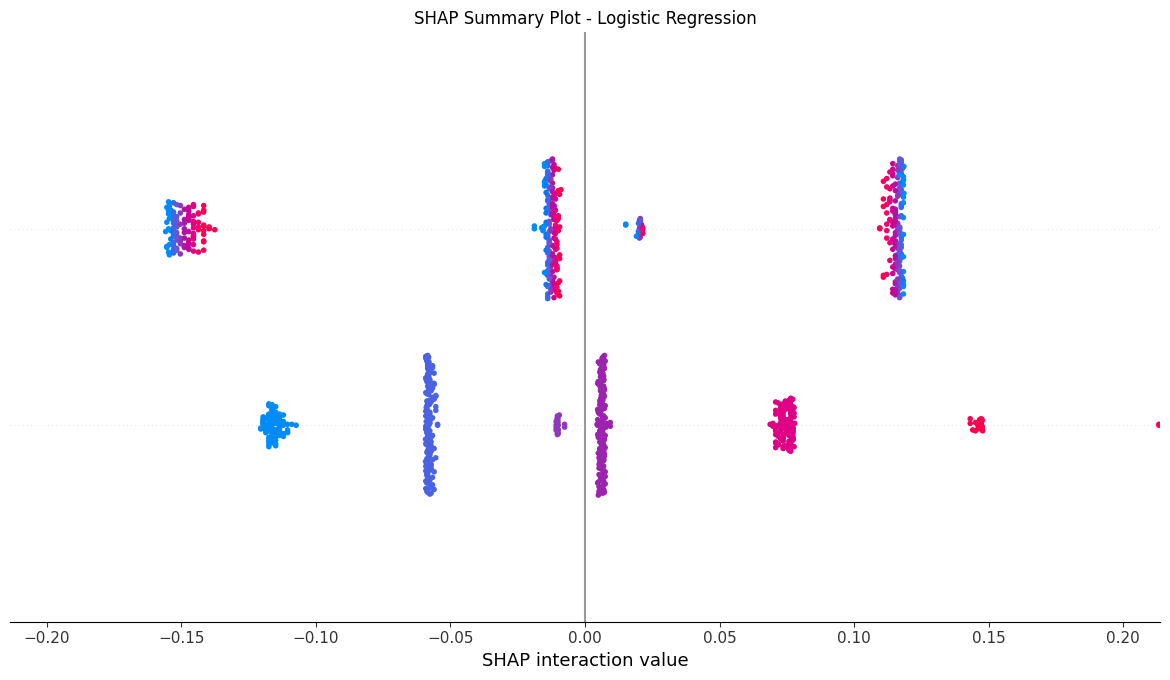


Model: Decision Tree


<Figure size 640x480 with 0 Axes>

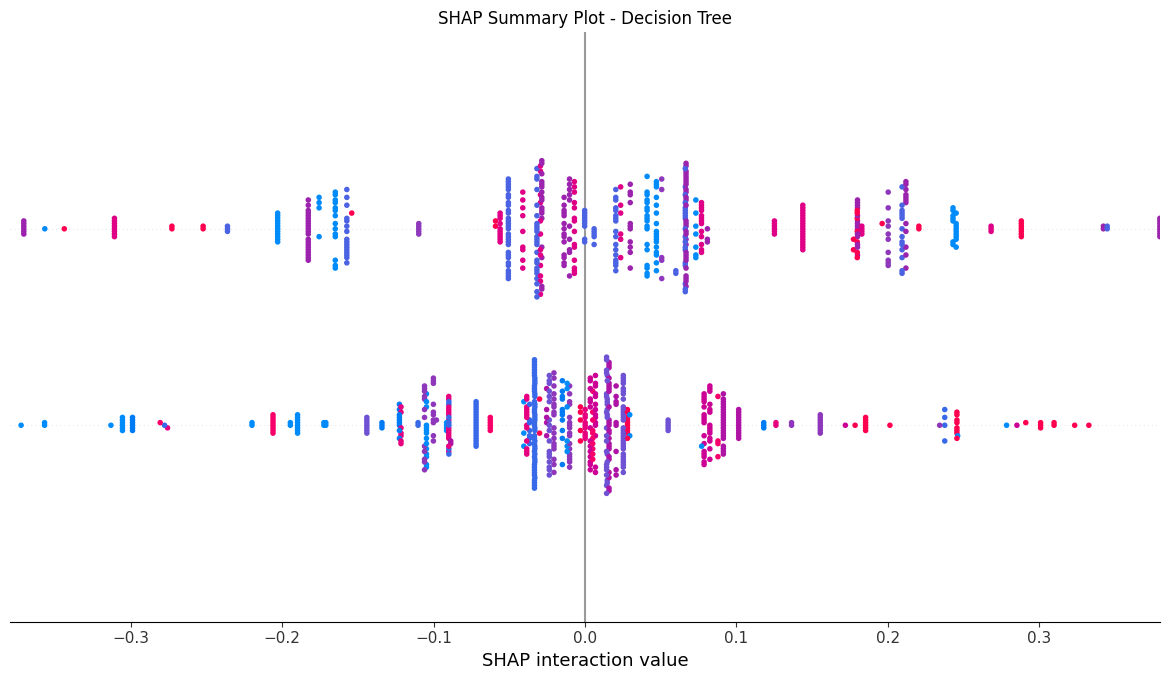


Model: Random Forest


<Figure size 640x480 with 0 Axes>

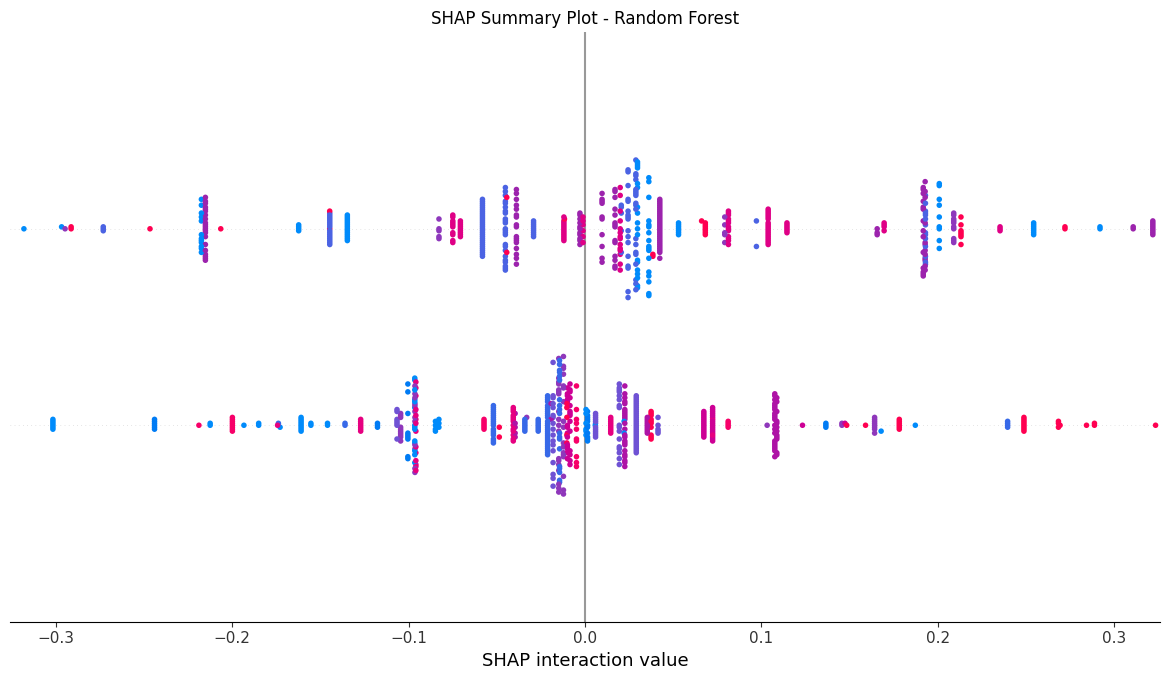


Model: Gradient Boosting


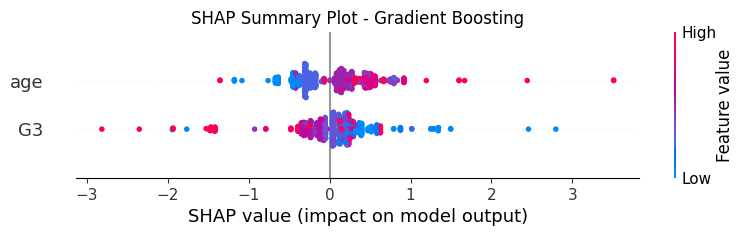


Model: Support Vector Machine


  0%|          | 0/584 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

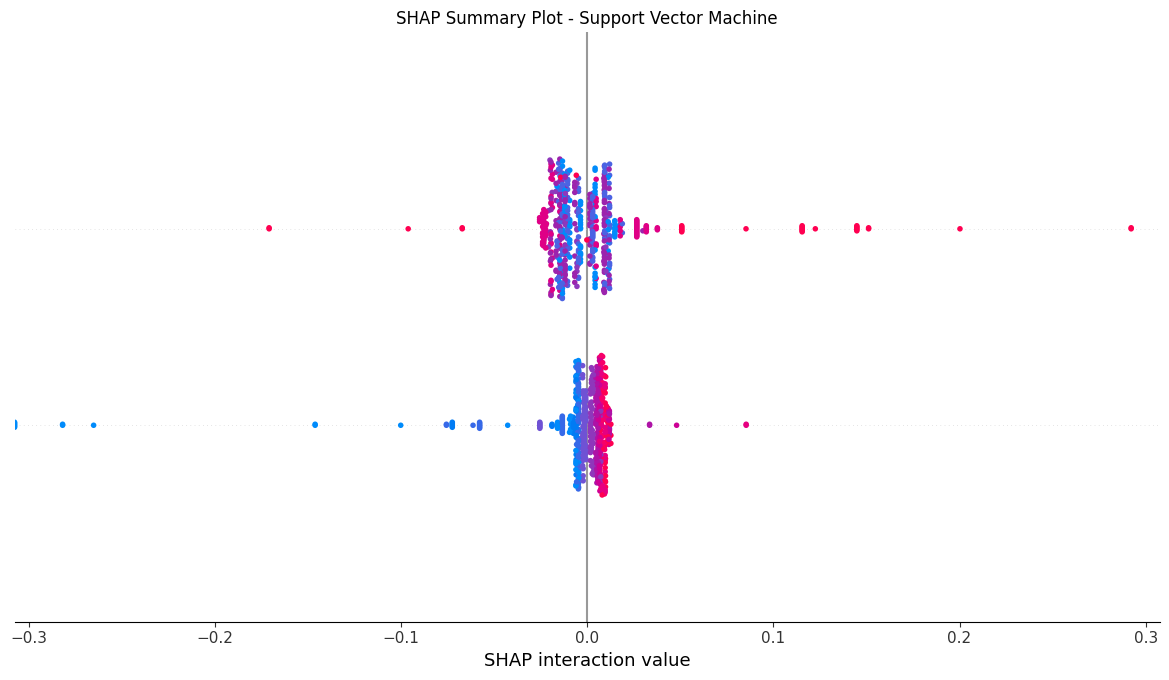


Model: K-Nearest Neighbors


  0%|          | 0/584 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

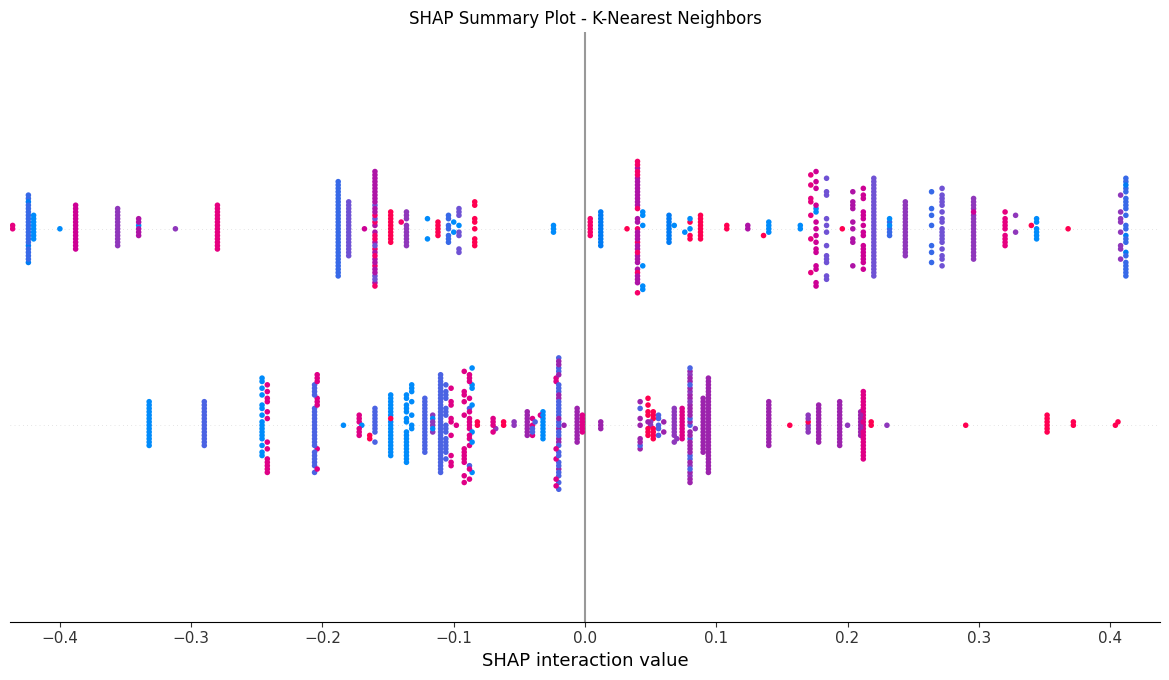


Model: Naive Bayes


  0%|          | 0/584 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

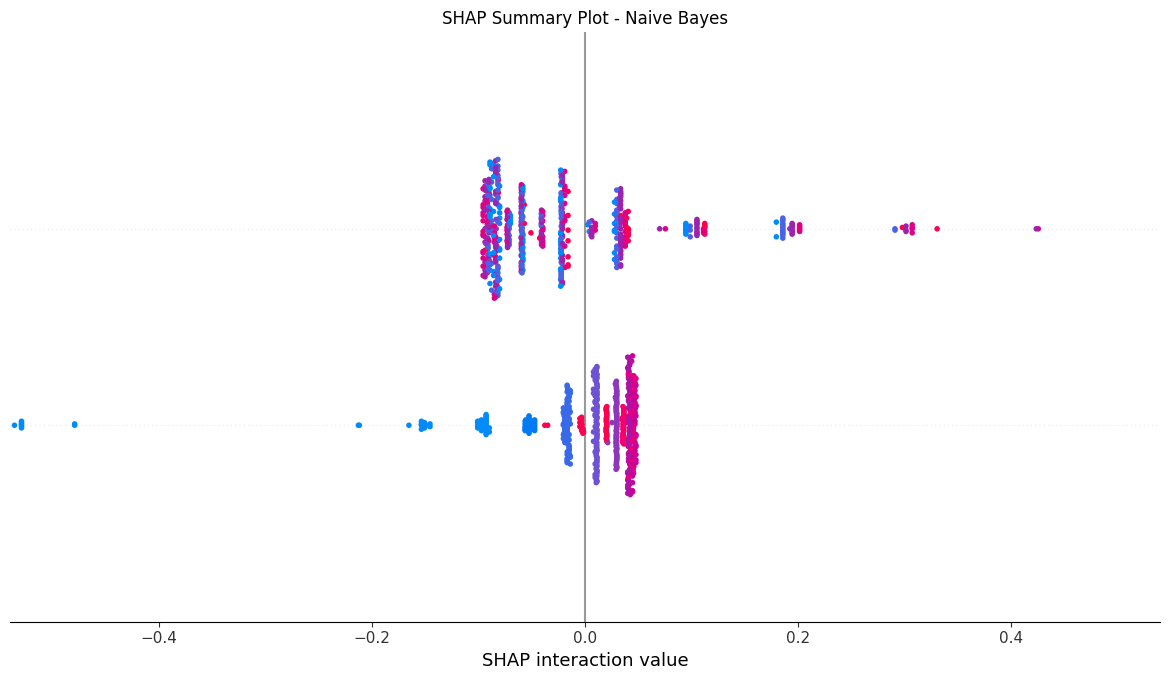

In [166]:
selected_features = ['G3', 'age']
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]
X_train_subset = X_train_subset.apply(pd.to_numeric, errors='raise')
X_test_subset = X_test_subset.apply(pd.to_numeric, errors='raise')
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_subset, y_train)
explainer = shap.Explainer(model.predict_proba, X_train_subset)
shap_values = explainer(X_test_subset)

# SHAP analysis loop
for name, model in models.items():
    print(f"\nModel: {name}")
    try:
        model.fit(X_train_subset, y_train)

        if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier)):
            explainer = shap.TreeExplainer(model, X_train_subset, feature_perturbation="interventional")
            shap_values = explainer.shap_values(X_train_subset, check_additivity=False)
            # Handle binary classifier
            if isinstance(shap_values, list):
                shap_vals_to_plot = shap_values[1]  # Positive class
                expected_val = explainer.expected_value[1]
            else:
                shap_vals_to_plot = shap_values
                expected_val = explainer.expected_value

        else:
            explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_subset, 50))
            shap_values = explainer.shap_values(X_train_subset, nsamples=100)
            shap_vals_to_plot = shap_values[1] if isinstance(shap_values, list) else shap_values
            expected_val = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

        # Summary plot
        shap.summary_plot(shap_vals_to_plot, X_train_subset, show=False)
        plt.title(f"SHAP Summary Plot - {name}")
        plt.show()


    except Exception as e:
        print(f"Skipping {name} due to error: {e}")